# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy import stats
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [103]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric" 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ojai
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | afaahiti
Processing Record 4 of Set 1 | salinopolis
Processing Record 5 of Set 1 | port macquarie
Processing Record 6 of Set 1 | udachny
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | kindu
Processing Record 9 of Set 1 | ahau
City not found. Skipping...
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | pyin oo lwin
Processing Record 14 of Set 1 | oranjemund
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | boende
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | morondava
Processing Record 22 of Set 1 | kayar

Processing Record 36 of Set 4 | hithadhoo
Processing Record 37 of Set 4 | cabedelo
Processing Record 38 of Set 4 | saint-philippe
Processing Record 39 of Set 4 | san luis ixcan
Processing Record 40 of Set 4 | olonkinbyen
Processing Record 41 of Set 4 | el porvenir
Processing Record 42 of Set 4 | campo grande
Processing Record 43 of Set 4 | colares
Processing Record 44 of Set 4 | tindouf
Processing Record 45 of Set 4 | saint louis
Processing Record 46 of Set 4 | rattvik
City not found. Skipping...
Processing Record 47 of Set 4 | new norfolk
Processing Record 48 of Set 4 | susuman
Processing Record 49 of Set 4 | essaouira
Processing Record 0 of Set 5 | hihifo
City not found. Skipping...
Processing Record 1 of Set 5 | al ghayzah
Processing Record 2 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 3 of Set 5 | shortandy
Processing Record 4 of Set 5 | juneau
Processing Record 5 of Set 5 | kapsowar
City not found. Skipping...
Processing Record 6 of Set 5 | tofol
Pro

Processing Record 24 of Set 8 | ulsteinvik
Processing Record 25 of Set 8 | campbellton
Processing Record 26 of Set 8 | isfana
Processing Record 27 of Set 8 | takoradi
Processing Record 28 of Set 8 | brookings
Processing Record 29 of Set 8 | piton saint-leu
Processing Record 30 of Set 8 | alesund
Processing Record 31 of Set 8 | nyurba
Processing Record 32 of Set 8 | pedregal
Processing Record 33 of Set 8 | touros
Processing Record 34 of Set 8 | guanambi
Processing Record 35 of Set 8 | borogontsy
Processing Record 36 of Set 8 | dives-sur-mer
Processing Record 37 of Set 8 | manuel ojinaga
City not found. Skipping...
Processing Record 38 of Set 8 | horta
Processing Record 39 of Set 8 | port hedland
Processing Record 40 of Set 8 | selkirk
Processing Record 41 of Set 8 | olavarria
Processing Record 42 of Set 8 | valparaiso
Processing Record 43 of Set 8 | bayanhongor
Processing Record 44 of Set 8 | sangkhla buri
Processing Record 45 of Set 8 | nova sintra
Processing Record 46 of Set 8 | jetal

Processing Record 13 of Set 12 | kavieng
Processing Record 14 of Set 12 | bangkalan
Processing Record 15 of Set 12 | gracias
Processing Record 16 of Set 12 | airuk
Processing Record 17 of Set 12 | primero de mayo
Processing Record 18 of Set 12 | kone
Processing Record 19 of Set 12 | quchan
Processing Record 20 of Set 12 | merowe
Processing Record 21 of Set 12 | andergrove
Processing Record 22 of Set 12 | lazaro cardenas
Processing Record 23 of Set 12 | kailua-kona
Processing Record 24 of Set 12 | storvreta
Processing Record 25 of Set 12 | san patricio
Processing Record 26 of Set 12 | sitka
Processing Record 27 of Set 12 | inari
Processing Record 28 of Set 12 | shevchenko
Processing Record 29 of Set 12 | bikenibeu village
Processing Record 30 of Set 12 | turpan
Processing Record 31 of Set 12 | toamasina
Processing Record 32 of Set 12 | urengoy
Processing Record 33 of Set 12 | manadhoo
Processing Record 34 of Set 12 | labrador city
Processing Record 35 of Set 12 | sinjai
Processing Recor

In [106]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [107]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ojai,34.4481,-119.2429,20.72,83,21,3.68,US,1696012716
1,bredasdorp,-34.5322,20.0403,14.80,87,100,2.57,ZA,1696012717
2,afaahiti,-17.7500,-149.2833,25.93,84,45,8.86,PF,1696012717
3,salinopolis,-0.6136,-47.3561,29.24,66,28,5.74,BR,1696012717
4,port macquarie,-31.4333,152.9167,11.05,89,1,1.53,AU,1696012718


In [108]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/ormon/OneDrive/Desktop/python-api-challenge/WeatherPy/output_data/cities.csv", index_label="City_ID")

In [109]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/ormon/OneDrive/Desktop/python-api-challenge/WeatherPy/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ojai,34.4481,-119.2429,20.72,83,21,3.68,US,1696012716
1,bredasdorp,-34.5322,20.0403,14.80,87,100,2.57,ZA,1696012717
2,afaahiti,-17.7500,-149.2833,25.93,84,45,8.86,PF,1696012717
3,salinopolis,-0.6136,-47.3561,29.24,66,28,5.74,BR,1696012717
4,port macquarie,-31.4333,152.9167,11.05,89,1,1.53,AU,1696012718


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

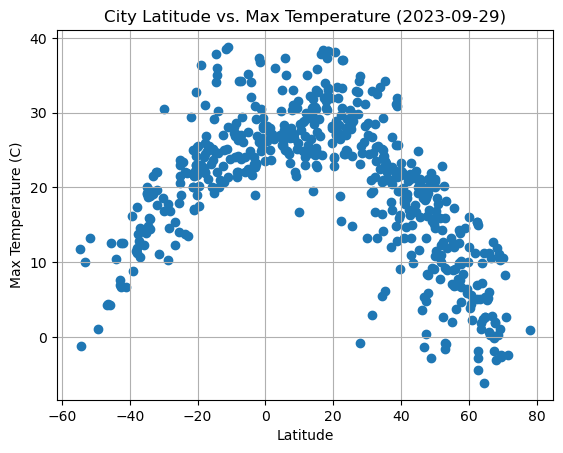

In [110]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2023-09-29)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

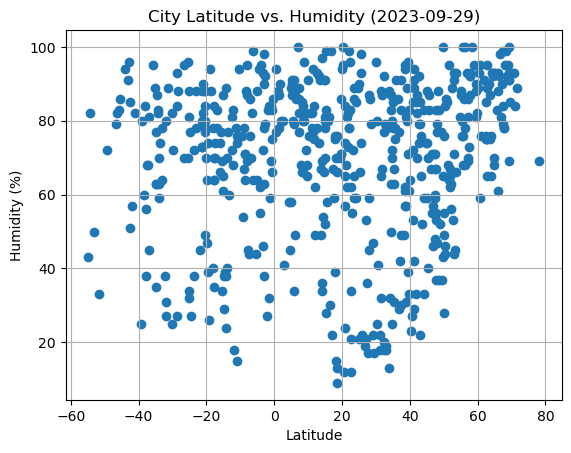

In [111]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-09-29)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

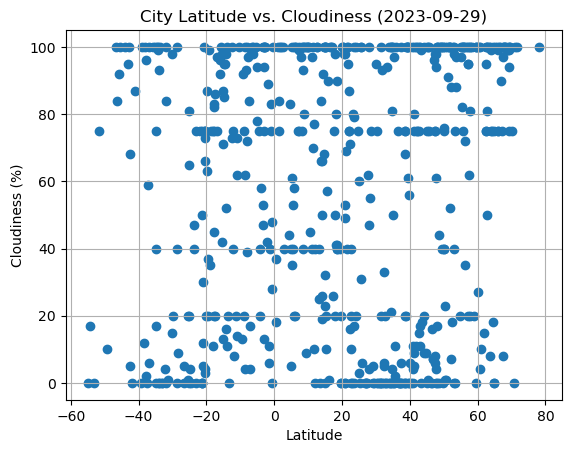

In [112]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-09-29)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

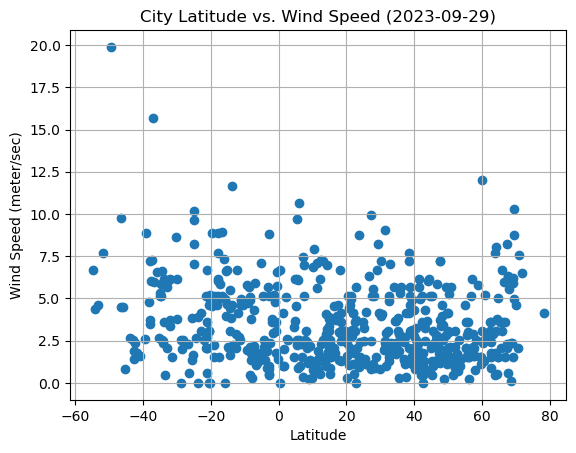

In [113]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-09-29)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (meter/sec)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [114]:
# Define a function to create Linear Regression plots
def linear_regression_plots(x_values, y_values, x_label, y_label, annotate_x, annotate_y, title):
    #perform linear regression:
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    #create the regression line:
    regression_values = x_values * slope + intercept
    
    #create the line equation:
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #create scatter plot:
    plt.scatter(x_values, y_values)
    
    #plot the regression line:
    plt.plot(x_values, regression_values, color='red')
        
    #print the line equation:
    plt.annotate(line_eq,(annotate_x,annotate_y),fontsize=15,color="red")
    
    #print the r value:
    print(f"The r-squared is: {rvalue**2}")
    
    #label the chart:
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    #show the plot:
    plt.show()

In [115]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df[city_data_df["Lat"]>= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ojai,34.4481,-119.2429,20.72,83,21,3.68,US,1696012716
5,udachny,66.4167,112.4000,0.25,92,100,5.97,RU,1696012718
6,georgetown,5.4112,100.3354,28.30,89,40,2.57,MY,1696012180
11,pyin oo lwin,22.0333,96.4667,18.89,99,87,1.10,MM,1696012720
13,ilulissat,69.2167,-51.1000,1.01,69,75,1.54,GL,1696012721


In [116]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df[city_data_df["Lat"]< 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bredasdorp,-34.5322,20.0403,14.80,87,100,2.57,ZA,1696012717
2,afaahiti,-17.7500,-149.2833,25.93,84,45,8.86,PF,1696012717
3,salinopolis,-0.6136,-47.3561,29.24,66,28,5.74,BR,1696012717
4,port macquarie,-31.4333,152.9167,11.05,89,1,1.53,AU,1696012718
7,kindu,-2.9500,25.9500,22.68,78,100,0.81,CD,1696012719


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6549244389754427


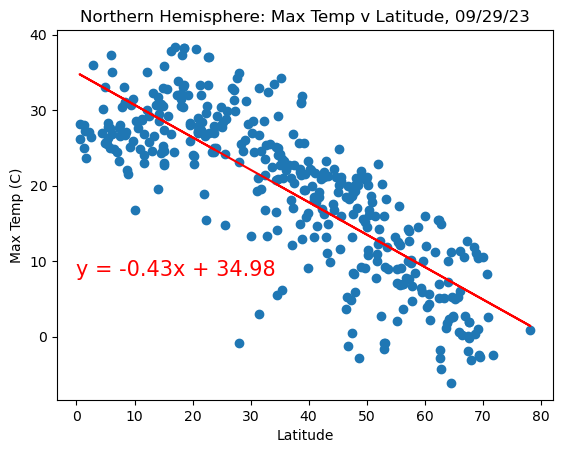

In [117]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp (C)'
annotate_x = 0
annotate_y = 8

title = 'Northern Hemisphere: Max Temp v Latitude, 09/29/23'

temp_v_lat = linear_regression_plots(x_values, y_values, x_label, y_label, annotate_x, annotate_y, title)
temp_v_lat

The r-squared is: 0.5967327956530214


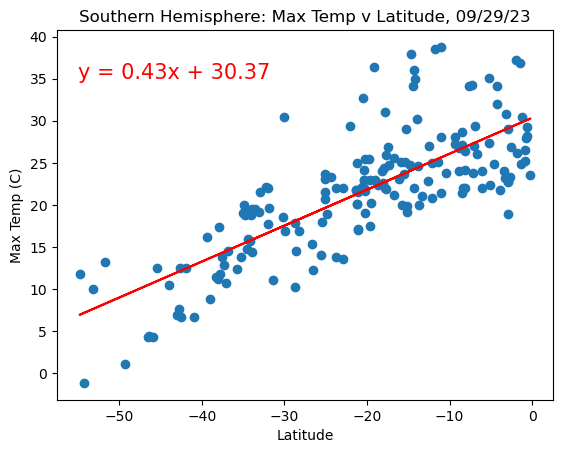

In [118]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp (C)'
annotate_x = -55
annotate_y = 35
title = 'Southern Hemisphere: Max Temp v Latitude, 09/29/23'

temp_v_lat = linear_regression_plots(x_values, y_values, x_label, y_label, annotate_x, annotate_y, title)
temp_v_lat

**Discussion about the linear relationship:*********************************************************************************** In the Northern hemisphere there is a moderately negative correlation between latitude and max temperature because the coefficient of x = -0.43, meaning, the further away from the equator a town resides (i.e., the greater the latitude is from 0), then the max temperature will be moderately lower.  Since r=0.65, this tells us that we can be moderately confident in assuming this latitude and max temperature relationship is true for many locations in the Northern hemisphere.                                                                                                                                                          In the Southern hemisphere there is a moderately positive correction between latitude and max temperature because the coefficient of x = 0.43, meaning, the closer a location is to the equator (i.e., the closer the latitude is to 0), then the max temperature will be moderately higher.  Since r=.596, this tells us we can be moderately confident in assuming this latitude and Max temperature relationship is true for many locations in the Southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.02325051516308804


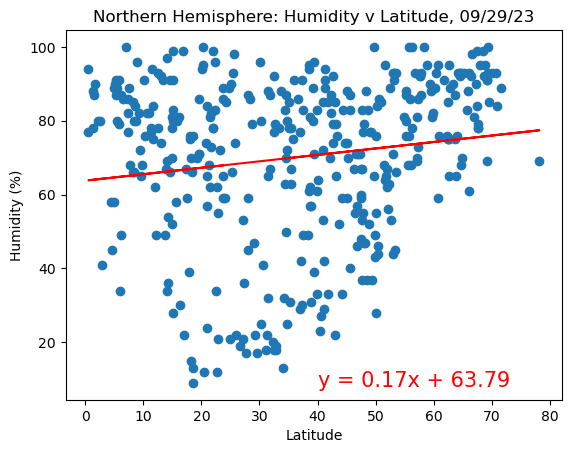

In [119]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'
annotate_x = 40
annotate_y = 8

title = 'Northern Hemisphere: Humidity v Latitude, 09/29/23'

temp_v_lat = linear_regression_plots(x_values, y_values, x_label, y_label, annotate_x, annotate_y, title)
temp_v_lat

The r-squared is: 0.0011485532985083546


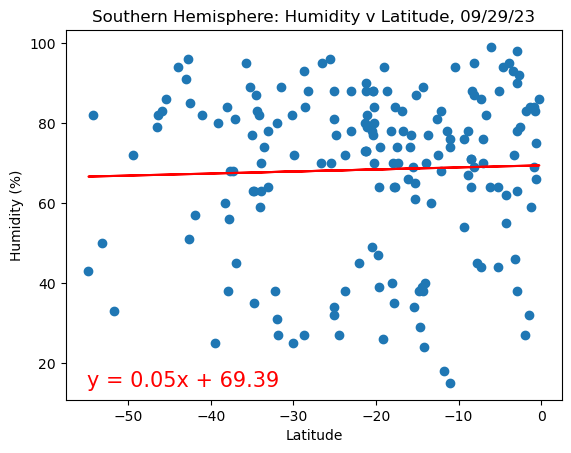

In [120]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'
annotate_x = -55
annotate_y = 14

title = 'Southern Hemisphere: Humidity v Latitude, 09/29/23'

temp_v_lat = linear_regression_plots(x_values, y_values, x_label, y_label, annotate_x, annotate_y, title)
temp_v_lat

**Discussion about the linear relationship:********************************************************************************** YOUR RESPONSE HERE

In the Northern hemisphere there is a weak positive correlation between latitude and humidity because the coefficient of x = 0.17, meaning, the further away from the equator a town resides (i.e., the greater the latitude is from 0), then the humidity will be slightly higher.  Since r=0.023, this tells us that the strength of correlation between latitude and humidity is none or very weak, therefore we cannot assume this is relationship is true for most locations in the Northern hemisphere.                                                              
In the Southern hemisphere there is a very weak positive correlation between latitude and humidity because the coefficient of x = 0.05, meaning, the closer to the equator a town resides (i.e., the closer the latitude is to 0), then the humidity will be slightly higher.  Since r=0.001, this tells us that the strength of correlation between latitude and humidity is practically none, therefore we cannot assume this relationship is true for most locations in the Southern hemisphere.   

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.011146043258555354


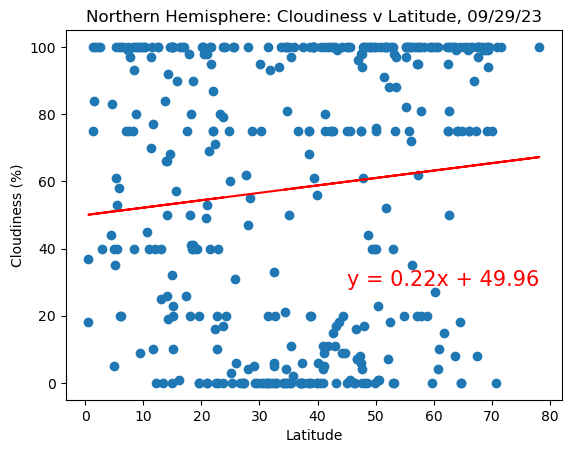

In [124]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
annotate_x = 45
annotate_y = 29

title = 'Northern Hemisphere: Cloudiness v Latitude, 09/29/23'

temp_v_lat = linear_regression_plots(x_values, y_values, x_label, y_label, annotate_x, annotate_y, title)
temp_v_lat

The r-squared is: 0.019719059177492226


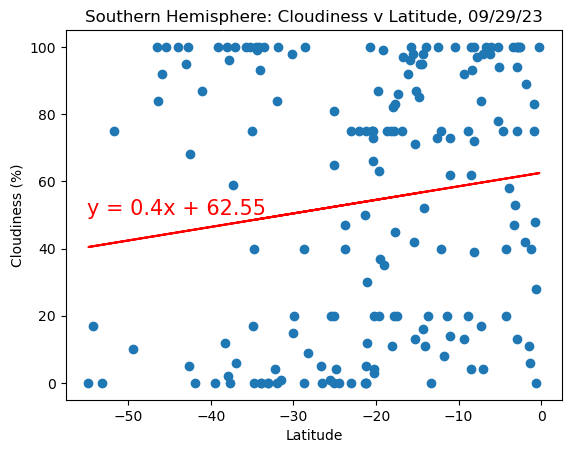

In [125]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
annotate_x = -55
annotate_y = 50

title = 'Southern Hemisphere: Cloudiness v Latitude, 09/29/23'

temp_v_lat = linear_regression_plots(x_values, y_values, x_label, y_label, annotate_x, annotate_y, title)
temp_v_lat

**Discussion about the linear relationship:********************************************************************************* YOUR RESPONSE HERE

In the Northern hemisphere there is a weak positive correlation between latitude and cloudiness because the coefficient of x = 0.22, meaning, the further away from the equator a town resides (i.e., the greater the latitude is from 0), the slightly cloudier it will be.  However, since r=0.011, this tells us that the strength of correlation between latitude and cloudiness is basically none, therefore we cannot assume this relationship is true for most locations in the Northern hemisphere.                                                              
In the Southern hemisphere there is a moderately positive correlation between latitude and cloudiness because the coefficient of x = 0.4, meaning, the closer to the equator a town resides (i.e., the closer the latitude is to 0), the moderately cloudier it will be.  However, since r=0.0197, this tells us that the strength of correlation between latitude and cloudiness is practically none, therefore we cannot assume this relationship is true for most locations in the Southern hemisphere.   

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0001107499099671018


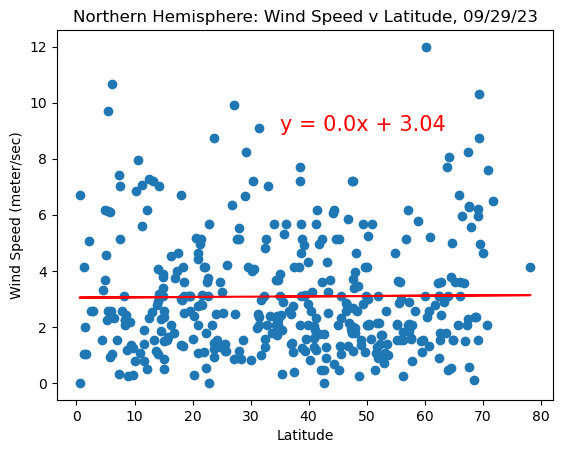

In [126]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed (meter/sec)'
annotate_x = 35
annotate_y = 9

title = 'Northern Hemisphere: Wind Speed v Latitude, 09/29/23'

temp_v_lat = linear_regression_plots(x_values, y_values, x_label, y_label, annotate_x, annotate_y, title)
temp_v_lat

The r-squared is: 0.050037250817983527


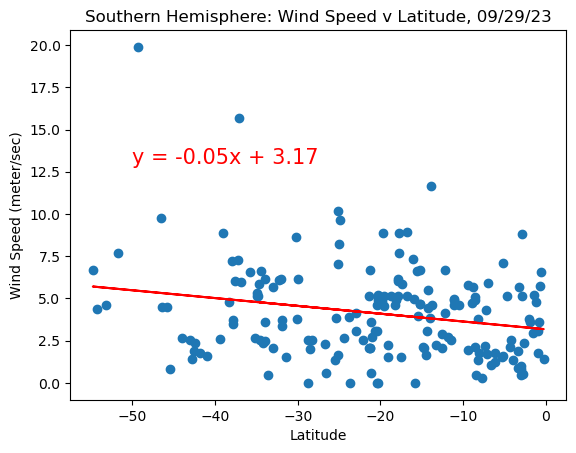

In [128]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed (meter/sec)'
annotate_x = -50
annotate_y = 13

title = 'Southern Hemisphere: Wind Speed v Latitude, 09/29/23'

temp_v_lat = linear_regression_plots(x_values, y_values, x_label, y_label, annotate_x, annotate_y, title)
temp_v_lat

**Discussion about the linear relationship:**********************************************************************************  In the Northern hemisphere there is a no correlation between latitude and wind speed because the coefficient of x = 0.00, meaning, the wind speed is independent of the location in the Northern Hemisphere.  Since r=0.00011, this tells us that the strength of correlation is basically none, thereby reinforcing the idea that wind speed is completely independent from latitude in the Northern hemisphere.                        
In the Southern hemisphere there is a weakly negative correlation between latitude and wind speed because the coefficient of x = -0.05, meaning, the closer to the equator a town resides (i.e., the closer the latitude is to 0), then the wind speed will be slightly lower.  Since r=0.05, this tells us that the strength of correlation is practically none, therefore we cannot assume this relationship is true for most locations in the Southern hemisphere.    